- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

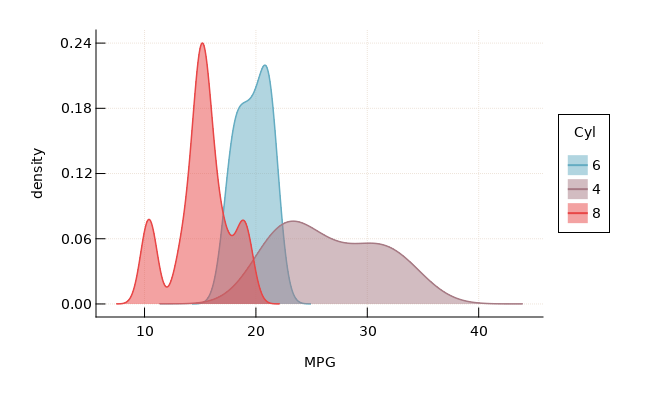

In [2]:
using RDatasets, StatsBase, KernelDensity, Colors
using CairoMakie, ColorSchemes
include("makieTheme6.jl") # don't forget to include the theme. 
cars = dataset("datasets", "mtcars")
byCat = cars.Cyl
categ = unique(byCat)
fig = Figure(resolution = (650, 400), font = "Avenir Light")
ax = Axis(fig, xlabel = "MPG", ylabel = "density")
colors = ColorScheme(range(colorant"#65ADC2", colorant"#E84646", length=length(categ)))
legends = []
for (i,c) in enumerate(categ)
    indc = findall(x->x == c, byCat)
    d = kde(cars.MPG[indc])
    linec = lines!(d.x, d.density, color = colors[i], linewidth = 1.5)
    bandc = band!(d.x, 0*d.density, d.density, color = (colors[i], 0.5))
    legc = [linec, bandc]
    push!(legends, legc)
end
leg = Legend(fig, legends, string.(categ), "Cyl")
fig[1,1] = ax
fig[1,2] = leg
save("./results/FigDensity_mtcarsLegRight.png", fig, px_per_unit = 2)
fig

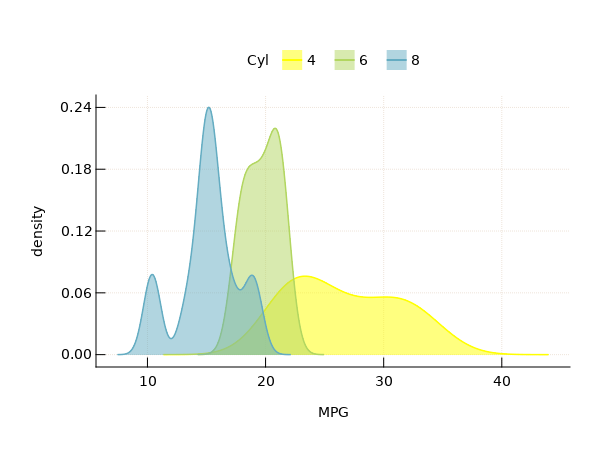

In [3]:
fig = Figure(resolution = (600, 450), font = "Avenir Light")
ax = Axis(fig, xlabel = "MPG", ylabel = "density")
colors = ColorScheme(range(colorant"yellow", colorant"#65ADC2", length=length(categ)))
legends = []
for (i,c) in enumerate(sort(categ))
    indc = findall(x->x == c, byCat)
    d = kde(cars.MPG[indc])
    linec = lines!(d.x, d.density, color = colors[i], linewidth = 1.5)
    bandc = band!(d.x, 0*d.density, d.density, color = (colors[i], 0.5))
    legc = [linec, bandc]
    push!(legends, legc)
end
leg = Legend(fig, legends, string.(sort(categ)), "Cyl", tellheight = true, tellwidth = false, 
    orientation = :horizontal, framevisible = false, titleposition = :left)
fig[2,1] = ax
fig[1,1] = leg
save("./results/FigDensity_mtcarsLegTop.png", fig, px_per_unit = 2)
fig